# Splitting Data into Train and Test

In [1]:
# Read Fashion MNIST dataset
import numpy as np
import util_mnist_reader
import pandas

X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')
x_train_original=X_train
y_train_original=y_train
x_test_original=X_test
y_test_original=y_test

# 1.Single Layer Artificial Neural Network from Scratch

# Normlizing Data

In [2]:
X_train=np.asarray(X_train)
X_train=X_train/255.0
y_train=np.asarray(y_train)
Y_train_actual=y_train
y_train=np.asarray(y_train)
y_train = pandas.get_dummies(y_train)
y_train=np.asarray(y_train)
print("Y_train:",Y_train_actual) #Original output

X_test=np.asarray(X_test)
X_test=X_test/255.0
y_test=np.asarray(y_test)
Y_test_actual=y_test
y_test=np.asarray(y_test)
y_test = pandas.get_dummies(y_test)
y_test=np.asarray(y_test)
print("Y_test:",Y_test_actual)

Y_train: [9 0 0 ... 3 0 5]
Y_test: [9 2 1 ... 8 1 5]


# Defining Helper Functions

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


In [4]:
def forward_prop(X_train, W1, W2, b1, b2):
    A1 = sigmoid(X_train.dot(W1) + b1) 
    A2 = softmax(A1.dot(W2) + b2)
    return A1,A2

In [5]:
def gradient_descent(A1, A2, y_true, W2):
    d2 = (A2 - y_true)
    d1 = ((d2).dot(W2.T) * A1 * (1 - A1))
    return d1,d2

In [6]:
def update_params(X_train,y_true,A1,d1,d2,W1,W2,b1,b2):
    W2 -= alpha * A1.T.dot(d2)
    b2 -= alpha * (d2).sum(axis=0)
    W1 -= alpha * X_train.T.dot(d1)
    b1 -= alpha * (d1).sum(axis=0)
    return W1,W2,b1,b2

In [7]:
def predict(X_train,W1,W2,b1,b2):
    Y_prev = sigmoid(X_train.dot(W1) + b1) 
    Y_predict = softmax(Y_prev.dot(W2) + b2)
    predictions = np.argmax(Y_predict, axis=1) 
    return predictions
    

In [8]:
y_true=y_train
y_true.shape
samples = X_train.shape[0] 
features = X_train.shape[1] 
hidden_nodes = 512
classes = 10

# randomly initialize weights
W1 = np.random.randn(features, hidden_nodes)
b1 = np.random.randn(hidden_nodes)
W2 = np.random.randn(hidden_nodes, classes)
b2 = np.random.randn(classes)

alpha = 10e-6
costs = []
accuracy= []
for epoch in range(200):
    
    #A = sigmoid(X_train.dot(W1) + b1) 
    #Y = softmax(A.dot(W2) + b2)
    A1,A2 = forward_prop(X_train,W1, W2, b1,b2)

    d1,d2 = gradient_descent(A1, A2, y_true, W2)

    W1,W2,b1,b2 = update_params(X_train,y_true,A1,d1,d2,W1,W2,b1,b2)

    if epoch % 10 == 0:
        loss = -1/samples*np.sum(y_true * np.log(A2))
        print("Loss function value after",epoch,"iterations: ", loss)
        costs.append(loss)
        predictions = predict(X_train,W1,W2,b1,b2)
        current_accuracy=sum(Y_train_actual==predictions)/samples
        accuracy.append(current_accuracy*100)
        print("Training Accuracy after",epoch,"iterations:", current_accuracy*100)
    


Loss function value after 0 iterations:  16.702774121747478
Training Accuracy after 0 iterations: 17.203333333333333
Loss function value after 10 iterations:  6.721905977424972
Training Accuracy after 10 iterations: 56.215
Loss function value after 20 iterations:  5.4045579009865685
Training Accuracy after 20 iterations: 63.431666666666665
Loss function value after 30 iterations:  3.475105086885631
Training Accuracy after 30 iterations: 67.74833333333333
Loss function value after 40 iterations:  3.4890337596630383
Training Accuracy after 40 iterations: 70.86833333333334
Loss function value after 50 iterations:  3.597062154999609
Training Accuracy after 50 iterations: 69.90666666666667
Loss function value after 60 iterations:  2.816124053577066
Training Accuracy after 60 iterations: 69.99
Loss function value after 70 iterations:  1.6666039891512248
Training Accuracy after 70 iterations: 72.33500000000001
Loss function value after 80 iterations:  2.3779895964410707
Training Accuracy afte

# Plotting Loss vs Iterations and Accuracy vs Iterations

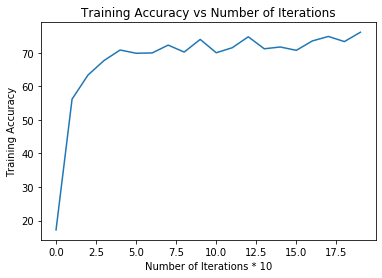

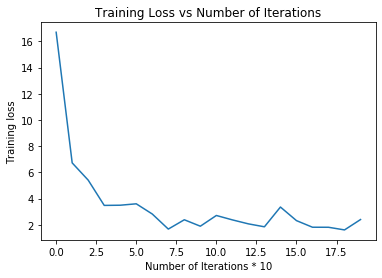

In [10]:
import matplotlib.pyplot as plt

plt.plot(accuracy)
plt.title("Training Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("Training Accuracy")
plt.show()


plt.plot(costs)
plt.title("Training Loss vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("Training loss")
plt.show()

# Calculating Test Accuracy

In [11]:
test_samples = X_test.shape[0]
A1_test,A2_test=forward_prop(X_test, W1, W2, b1, b2)
test_predictions = predict(X_test,W1,W2,b1,b2)
current_test_accuracy=sum(Y_test_actual==test_predictions)/test_samples
print("Test Accuracy with the current Model:", current_test_accuracy*100)

Test Accuracy with the current Model: 73.56


# Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
confs_matrix = confusion_matrix(Y_test_actual, test_predictions)
confs_matrix

array([[510,  15,   1,  67,   9,   4, 375,   0,  19,   0],
       [  3, 924,   2,  32,  11,   0,  26,   0,   2,   0],
       [ 11,  11, 217,  18, 253,   1, 479,   1,   7,   2],
       [ 16,  27,   1, 762,  68,   4, 110,   2,   8,   2],
       [  1,   4,   6,  25, 689,   6, 262,   0,   7,   0],
       [  2,   0,   0,   1,   0, 861,   9,  72,  16,  39],
       [ 45,  11,  21,  27,  95,   7, 770,   0,  24,   0],
       [  0,   1,   0,   0,   0,  66,   1, 865,   3,  64],
       [  1,   5,   2,   9,  12,  13,  73,  15, 868,   2],
       [  0,   0,   0,   1,   0,  38,   6,  63,   2, 890]], dtype=int64)

# 2. Multilayer Neural Network with Keras

In [13]:
X_train=x_train_original
y_train=y_train_original
X_test=x_test_original
y_test=y_test_original

In [14]:
from keras.models import Sequential
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

from keras.layers import Dense
import numpy as np
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
X_train[0].shape

(784,)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train /= 255.0
X_test /= 255.0

In [19]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights= True)

In [20]:
ann = Sequential()

In [21]:
ann.add(Dense(128,activation = 'tanh',input_shape=(784,)))
ann.add(Dense(64,activation = 'sigmoid'))
ann.add(Dense(10,activation = 'softmax'))

In [22]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [23]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = ann.fit(X_train,y_train, epochs = 100, validation_data = (X_test,y_test), callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.5193 - accuracy: 0.8209 - val_loss: 0.4385 - val_accuracy: 0.8405
Epoch 2/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.3665 - accuracy: 0.8674 - val_loss: 0.3850 - val_accuracy: 0.8584
Epoch 3/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.3341 - accuracy: 0.8769 - val_loss: 0.3859 - val_accuracy: 0.8594
Epoch 4/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.3119 - accuracy: 0.8853 - val_loss: 0.3554 - val_accuracy: 0.8701
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2956 - accuracy: 0.8915 - val_loss: 0.3418 - val_accuracy: 0.8762
Epoch 6/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.2804 - accuracy: 0.8957 - val_loss: 0.3403 - val_accuracy: 0.8776
Epoch 7/100
60000/60000 [==============================] - 5s 

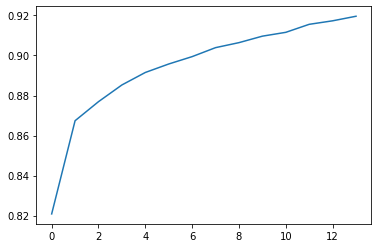

In [25]:
plt.plot(history.history['accuracy'])

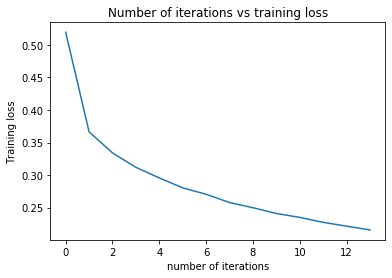

In [27]:
plt.title('Number of iterations vs training loss')
plt.xlabel('number of iterations')
plt.ylabel('Training loss')
plt.plot(history.history['loss'])

In [28]:
out_score = ann.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 44us/step


In [29]:
out_score

[0.32408994475603103, 0.8834999799728394]

In [30]:
predicted_output = ann.predict(X_test)

In [31]:
predicted_output

array([[7.5774915e-05, 1.9163915e-06, 2.7322683e-05, ..., 1.2940320e-02,
        6.3229254e-06, 9.6610862e-01],
       [5.8812666e-04, 7.1940817e-06, 9.9031770e-01, ..., 1.6206145e-07,
        3.0220942e-06, 4.7779457e-07],
       [4.3359072e-05, 9.9986577e-01, 9.1105458e-06, ..., 2.2119611e-06,
        9.4182215e-06, 2.4750238e-06],
       ...,
       [7.4652252e-03, 7.2091495e-07, 4.5278860e-04, ..., 1.1280729e-05,
        9.8540330e-01, 2.3087425e-05],
       [8.7779536e-06, 9.9971336e-01, 5.8170926e-06, ..., 2.2524996e-06,
        6.8231270e-06, 1.1670529e-05],
       [1.4770292e-06, 1.4236117e-06, 2.2414226e-06, ..., 4.6165995e-04,
        6.5984527e-06, 1.6690232e-06]], dtype=float32)

In [33]:
y_predicted = (predicted_output > 0.5)

In [34]:
y_predicted

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

In [37]:
conf_matrix

array([[870,   0,   6,  13,   3,   0, 105,   0,   3,   0],
       [ 10, 970,   1,  15,   3,   0,   1,   0,   0,   0],
       [ 73,   0, 741,   7, 117,   1,  61,   0,   0,   0],
       [ 61,   7,   4, 866,  42,   1,  17,   0,   2,   0],
       [ 38,   1,  60,  16, 848,   0,  37,   0,   0,   0],
       [  4,   0,   0,   0,   0, 946,   0,  27,   1,  22],
       [181,   0,  52,  20,  89,   0, 655,   0,   3,   0],
       [  5,   0,   0,   0,   0,  13,   0, 951,   0,  31],
       [ 28,   0,   2,   4,   5,   4,   3,   4, 950,   0],
       [  3,   0,   0,   0,   0,   6,   1,  30,   0, 960]], dtype=int64)

# 3.Classification using Convolutional Neural Network

In [2]:
X_train=x_train_original
y_train=y_train_original
X_test=x_test_original
y_test=y_test_original

In [3]:
from keras.models import Sequential
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
#print(X_train[0].shape)
#X_train[0] = np.arange(784)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
print(X_train.shape)
y_train = to_categorical(y_train,10)
#print(y_train.shape)
y_test = to_categorical(y_test,10)

(60000, 28, 28, 1)


In [5]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto', restore_best_weights= True)

In [6]:
conv_nn = Sequential()

In [7]:
conv_nn.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
conv_nn.add(MaxPooling2D(pool_size=2))
conv_nn.add(Conv2D(16, kernel_size=2, padding='same', activation='tanh'))
conv_nn.add(MaxPooling2D(pool_size=2))
conv_nn.add(Flatten())
conv_nn.add(Dense(128, activation='relu'))
conv_nn.add(Dense(10, activation='softmax'))

In [8]:
conv_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [9]:
conv_nn.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
history = conv_nn.fit(X_train,y_train, epochs = 50,validation_data = (X_test,y_test), callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 41s 678us/step - loss: 0.4461 - accuracy: 0.8394 - val_loss: 0.3649 - val_accuracy: 0.8656
Epoch 2/50
60000/60000 [==============================] - 40s 667us/step - loss: 0.2943 - accuracy: 0.8922 - val_loss: 0.3103 - val_accuracy: 0.8878
Epoch 3/50
60000/60000 [==============================] - 40s 664us/step - loss: 0.2533 - accuracy: 0.9067 - val_loss: 0.2730 - val_accuracy: 0.8999
Epoch 4/50
60000/60000 [==============================] - 40s 674us/step - loss: 0.2242 - accuracy: 0.9174 - val_loss: 0.2568 - val_accuracy: 0.9066
Epoch 5/50
60000/60000 [==============================] - 40s 671us/step - loss: 0.2004 - accuracy: 0.9255 - val_loss: 0.2813 - val_accuracy: 0.8980
Epoch 6/50
60000/60000 [==============================] - 39s 657us/step - loss: 0.1824 - accuracy: 0.9327 - val_loss: 0.2506 - val_accuracy: 0.9120
Epoch 7/50
60000/60000 [==============================] 

Text(0, 0.5, 'training loss')

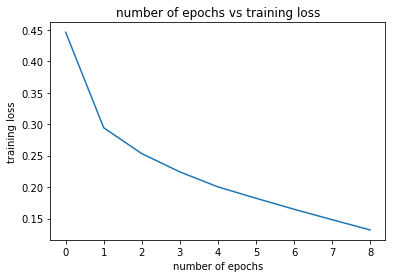

In [11]:
plt.title('number of epochs vs training loss')

plt.plot(history.history['loss'])
plt.xlabel('number of epochs')
plt.ylabel('training loss')

In [14]:
score = conv_nn.evaluate(X_test,y_test)
predict_cnn = conv_nn.predict(X_test)
y_pred = (predict_cnn > 0.5)
c_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

10000/10000 [==============================] - 1s 109us/step


In [15]:
c_matrix

array([[883,   0,   9,  28,   5,   1,  72,   0,   2,   0],
       [  8, 981,   0,  11,   0,   0,   0,   0,   0,   0],
       [ 46,   1, 862,   9,  43,   0,  39,   0,   0,   0],
       [ 33,   8,   6, 921,  18,   0,  13,   0,   1,   0],
       [ 33,   1,  33,  32, 849,   0,  52,   0,   0,   0],
       [  0,   0,   0,   0,   0, 982,   0,  15,   0,   3],
       [146,   1,  57,  29,  65,   0, 699,   0,   3,   0],
       [  1,   0,   0,   0,   0,   3,   0, 980,   0,  16],
       [ 19,   1,   2,   3,   2,   1,   4,   4, 961,   3],
       [  3,   0,   0,   0,   0,   7,   0,  39,   0, 951]])